<a href="https://colab.research.google.com/github/abksyed/EVA4/blob/master/09_DataAugmentation/Assignment_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Repository github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-9
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

In [2]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
gdrivepath="gdrive/My Drive/Colab Notebooks/S9/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!rm Albumentation.py data.py Net.py test.py train.py 
!ls
print("-----------------------------------------")
!ls "gdrive/My Drive/Colab Notebooks/S9/packages"

rm: cannot remove 'Net.py': No such file or directory
data	grad_model.py  __pycache__  sample_data
gdrive	plot.py        resnet.py    summary.py
-----------------------------------------
Albumentation.py  grad_model.py  resnet.py   test.py
data.py		  plot.py	 summary.py  train.py


In [4]:
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/Albumentation.py" Albumentation.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/data.py" data.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/resnet.py" resnet.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/test.py" test.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/train.py" train.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/summary.py" summary.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/plot.py" plot.py
!cp "gdrive/My Drive/Colab Notebooks/S9/packages/grad_model.py" grad_model.py
#!cp "gdrive/My Drive/Colab Notebooks/S9/packages/plot.py" packages/plot.py
#!cp "gdrive/My Drive/Colab Notebooks/S9/packages/summary.py" packages/summary.py
!ls 

Albumentation.py  data.py  grad_model.py  __pycache__  sample_data  test.py
data		  gdrive   plot.py	  resnet.py    summary.py   train.py


In [5]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For Reproducibility
torch.manual_seed(1)

if cuda:
    torch.cuda.manual_seed(1)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

CUDA Available? True
Tesla T4


In [6]:
import Albumentation
import data as data

CUDA Available? True


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


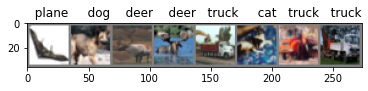

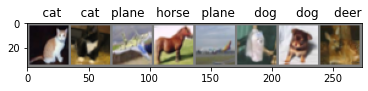

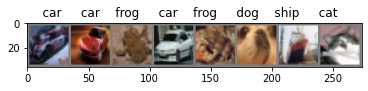

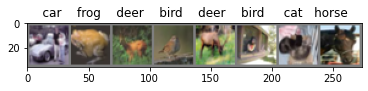

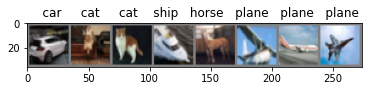

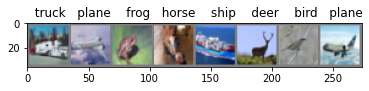

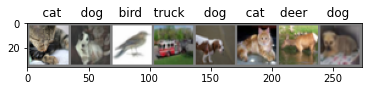

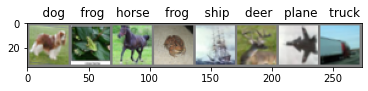

In [7]:
train_loader, test_loader = data.loader(128)
data.display()

In [8]:
from resnet import *

In [9]:
!pip install torchsummary
import summary
summary.summ(device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [10]:
import train as tr
import test as te

In [11]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


model = ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

epochs = 15

for epoch in range(epochs):
  print('EPOCH: ', epoch+1)
  tr.train(model, device, train_loader, optimizer, epoch)
  #scheduler.step()
  te.test(model, device, test_loader)
  if tr.train_endacc[-1] > 99.9:
    break

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=0.8183719515800476 Batch_id=390 Accuracy=52.67: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6433/10000 (64.33%)

EPOCH:  2


Loss=0.7957063317298889 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]



Test set: Average loss: 0.0063, Accuracy: 7208/10000 (72.08%)

EPOCH:  3


Loss=0.5800358653068542 Batch_id=390 Accuracy=78.69: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7756/10000 (77.56%)

EPOCH:  4


Loss=0.3589046597480774 Batch_id=390 Accuracy=82.81: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7812/10000 (78.12%)

EPOCH:  5


Loss=0.3544406294822693 Batch_id=390 Accuracy=85.16: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8099/10000 (80.99%)

EPOCH:  6


Loss=0.32616153359413147 Batch_id=390 Accuracy=87.10: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8050/10000 (80.50%)

EPOCH:  7


Loss=0.40192222595214844 Batch_id=390 Accuracy=88.52: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]



Test set: Average loss: 0.0044, Accuracy: 8164/10000 (81.64%)



  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  8


Loss=0.27645784616470337 Batch_id=390 Accuracy=89.76: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8334/10000 (83.34%)

EPOCH:  9


Loss=0.24642114341259003 Batch_id=390 Accuracy=91.00: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8311/10000 (83.11%)

EPOCH:  10


Loss=0.5293097496032715 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8483/10000 (84.83%)

EPOCH:  11


Loss=0.4268195629119873 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8545/10000 (85.45%)

EPOCH:  12


Loss=0.1604747474193573 Batch_id=390 Accuracy=93.60: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]



Test set: Average loss: 0.0036, Accuracy: 8656/10000 (86.56%)

EPOCH:  13


Loss=0.13510838150978088 Batch_id=390 Accuracy=94.02: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8493/10000 (84.93%)

EPOCH:  14


Loss=0.05419072508811951 Batch_id=390 Accuracy=94.92: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8618/10000 (86.18%)

EPOCH:  15


Loss=0.19146430492401123 Batch_id=390 Accuracy=95.57: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]



Test set: Average loss: 0.0035, Accuracy: 8721/10000 (87.21%)



Directory  gdrive/My Drive/Colab Notebooks/S9/content/mis_class/ and gdrive/My Drive/Colab Notebooks/S9/content/mis_class/images  already exists

Test set: Average loss: -12.7524, Accuracy: 8721/10000 (87.21%)

torch.Size([1279, 3, 32, 32])


<Figure size 432x288 with 0 Axes>

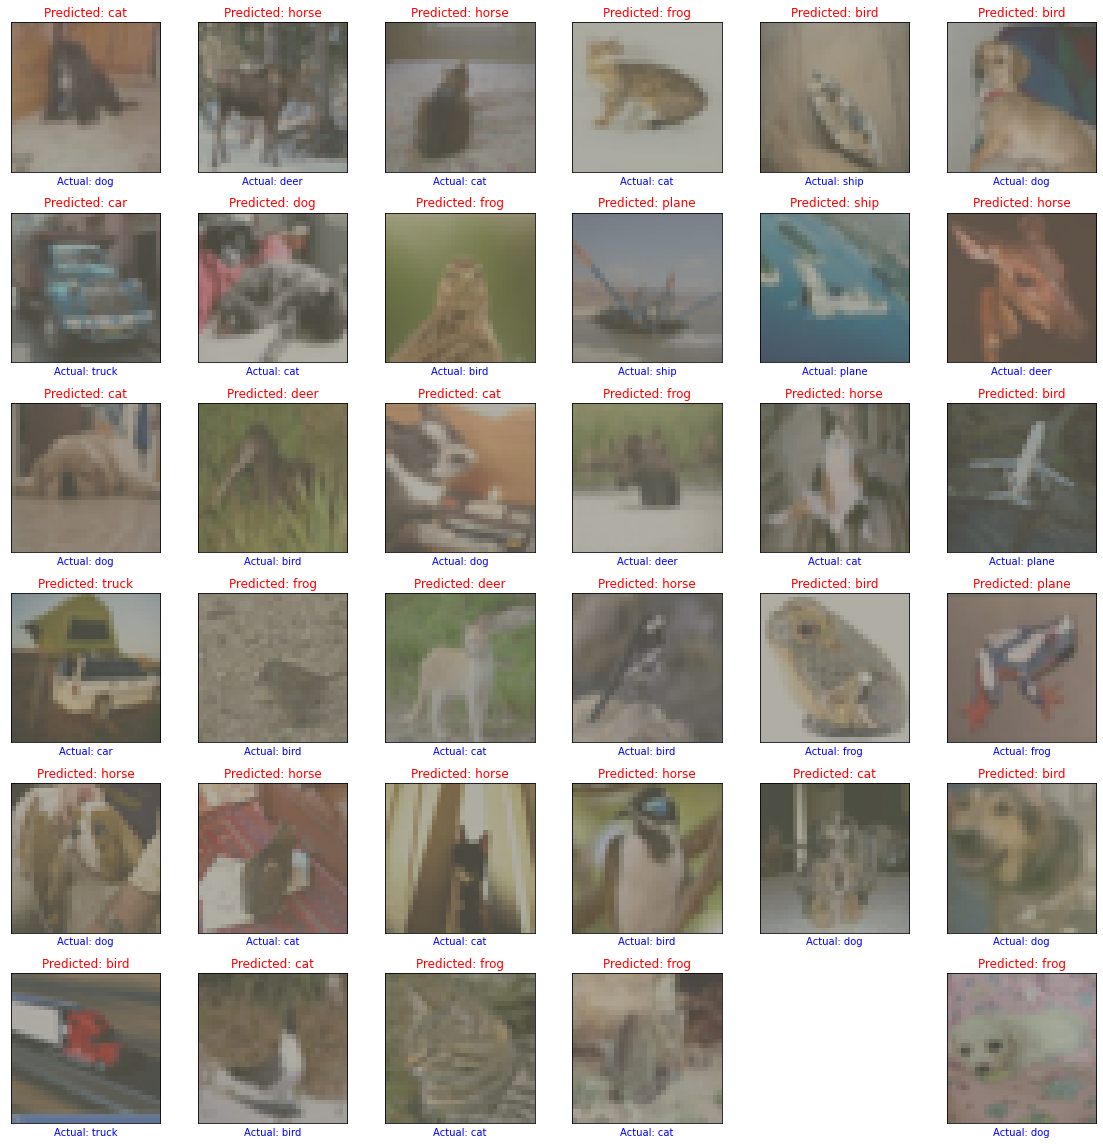

In [12]:
import plot
path = gdrivepath + 'savedmodel/classifier.pt'
saved_model = ResNet18().to(device)
saved_model.load_state_dict(torch.load(path))
saved_model.eval()
plot.mis(saved_model, device, test_loader, 36)



In [13]:
plot.gen_grad(saved_model, 36,0.3,0.7)

Directory  gdrive/My Drive/Colab Notebooks/S9/content/map/  already exists
Directory  gdrive/My Drive/Colab Notebooks/S9/content/heatmap/  already exists


<Figure size 432x288 with 0 Axes>

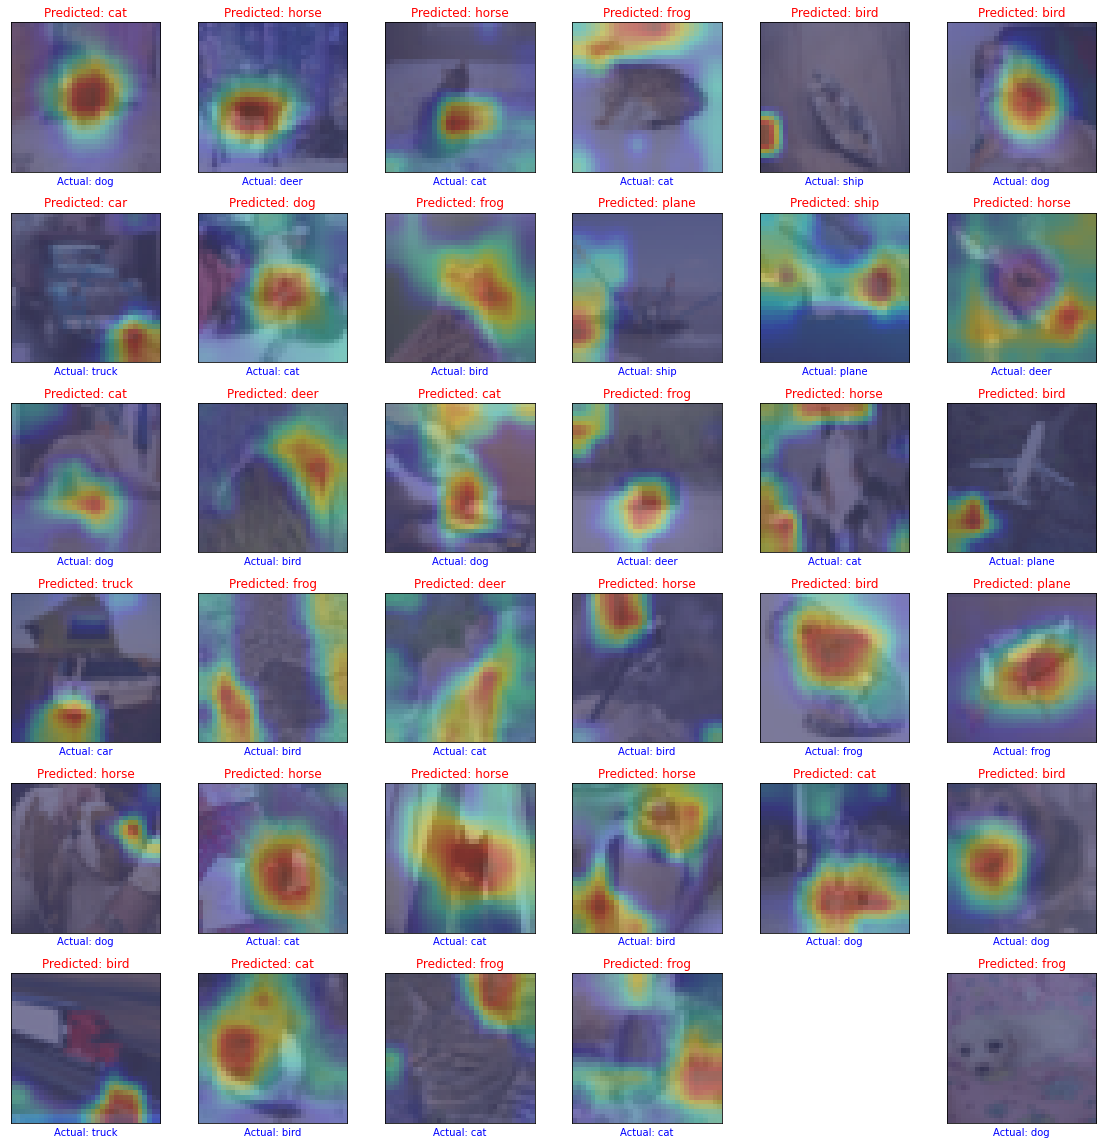

In [14]:
plot.plt_grad()

<Figure size 432x288 with 0 Axes>

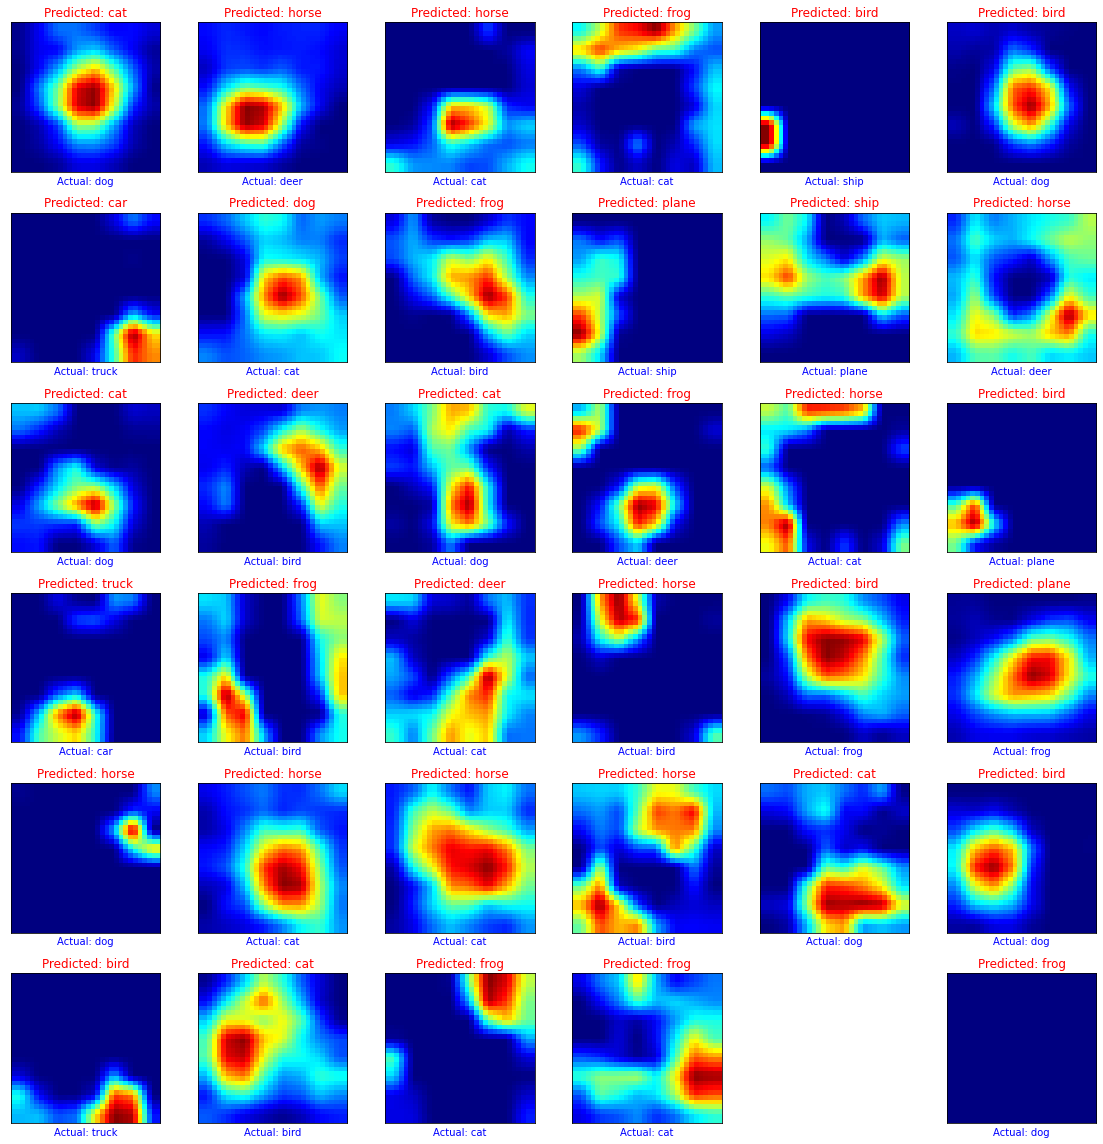

In [15]:
plot.heat_map()

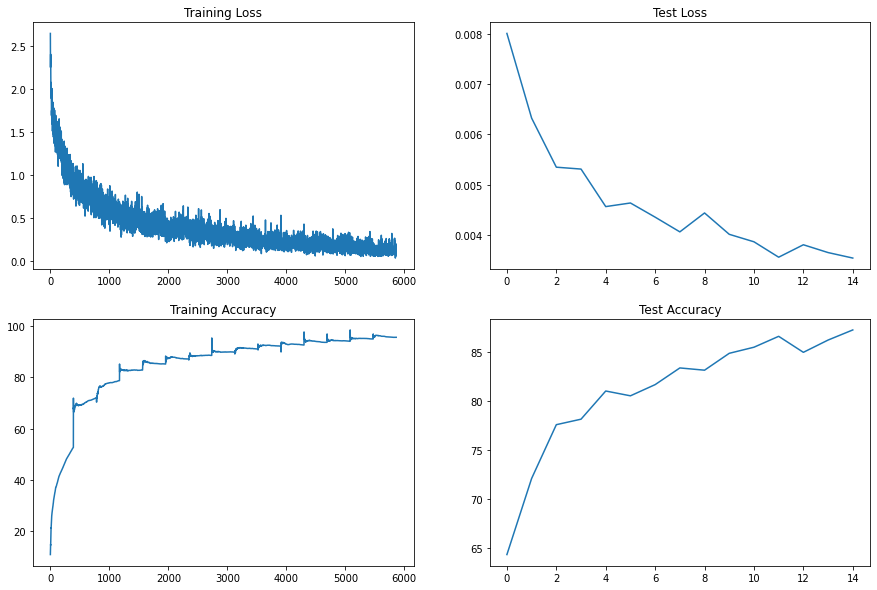

In [16]:
plot.graph(tr,te)

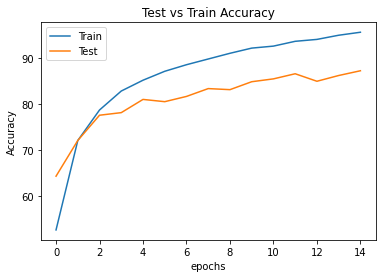

In [17]:
plot.testvtrain(tr,te)

In [18]:
plot.class_acc(saved_model,device, test_loader)

Accuracy of plane : 91 %
Accuracy of   car : 93 %
Accuracy of  bird : 88 %
Accuracy of   cat : 68 %
Accuracy of  deer : 89 %
Accuracy of   dog : 70 %
Accuracy of  frog : 92 %
Accuracy of horse : 95 %
Accuracy of  ship : 91 %
Accuracy of truck : 91 %
